#**1.Introduction**

Breast cancer is the most common cancer among women and one of the major causes of death among women worldwide. Every year approximately 124 out of 100,000 women are diagnosed with breast cancer, and the estimation is that 23 out of the 124 women will die of this disease. When detected in its early stages, there is a 30% chance that the cancer can be treated effectively, but the late detection of advanced-stage tumors makes the treatment more difficult. Currently, the most used techniques to detect breast cancer in early stages are: mammography (63% to 97% correctness), FNA (Fine Needle Aspiration) with visual interpretation (65% to 98% correctness [6]) and surgical biopsy (approximately 100% correctness). Therefore, mammography and FNA with visual interpretation correctness varies widely, and the surgical biopsy, although reliable, is invasive and costly.

“People used to say everyone knows someone who’s had breast cancer. In the past few weeks, I’ve learned something else: Everyone has someone close to them who has had breast cancer.-Debbie Wasserman Schultz, US House of Representatives, breast cancer survivor. Of the 184 major countries in the world, breast cancer is the most common cancer diagnosis in women in 140 countries (76%) and the most frequent cause of cancer mortality in 101 countries (55%).
Breast cancer ratio are statistically higher in women in more developed countries as compared to other diseases. But it is also globally increasing day by day. Table 1 Shows the ranking of top twenty-five countries most affected by breast cancer. To discourage the growth of breast cancer, it is important to focus on early detection. Early diagnosis and screening are two main methods of advance detection.

Sample of cytological images of breast cancer: left benign and right malignant. In the literature, there are several computational techniques that have been used for the computer-aided detection and diagnosis of breast cancer.

The table below shows the ranking of top twenty-five countries most affected by breast cancer. To discourage the growth of breast cancer, it is important to focus on early detection. Early diagnosis and screening are two main methods of advance detection of breast cancer. The poor regions can be made aware by familiarizing with early diagnosis program, as state by World Health Organization. It includes early diagnosis, screening, mammography and Clinical Breast Exam (CBE)


#**2. Method**


The analysis follows the steps as below.



In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**3.EDA**

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/drive/MyDrive/DS_Prod/December /Breast Cancer Analysis./Breast Cancer Analysis_CSV.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [29]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [30]:
print(df.shape)

(569, 33)


In [31]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [32]:
df = df.drop(['id','Unnamed: 32'], axis = 1)

In [33]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


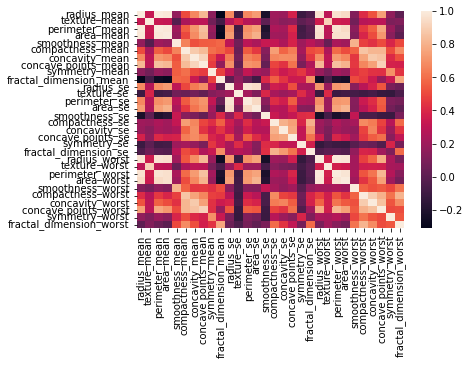

In [34]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

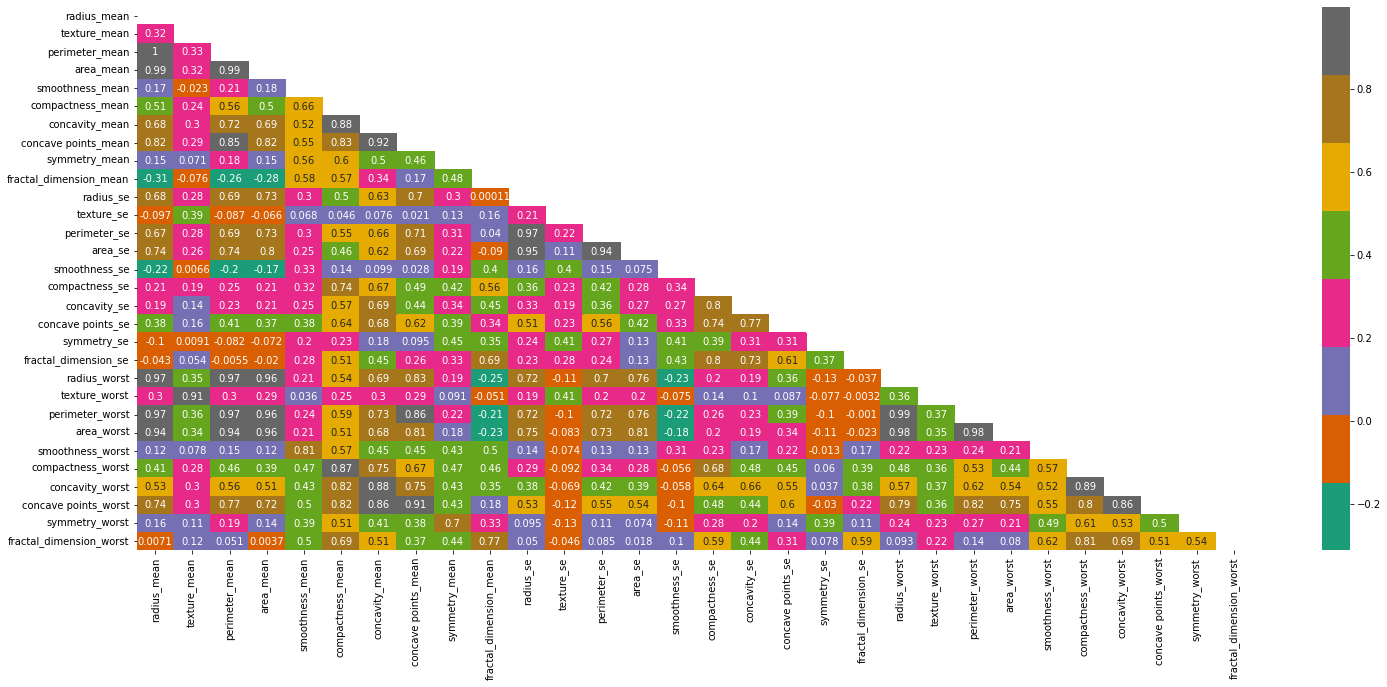

In [35]:
plt.figure(figsize=(25, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask = mask, annot=True, cmap='Dark2');

In [36]:
df.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

#**4. Analyze**

In [37]:
x = df.drop(['diagnosis'],axis = 1)
y = df['diagnosis']
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x)

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

#4.1 First model Prediction Algorithms:


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [41]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain, ytrain)
    test = model.score(xtest, ytest)
    
    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
    print(classification_report(ytest, ypred))
    
    return model

##*1. KNN Alogrithm*

---



In [42]:
knn = mymodel(KNeighborsClassifier())

Training Accuracy : 0.9422110552763819
Testing Accuracy : 0.9239766081871345


              precision    recall  f1-score   support

           0       0.93      0.95      0.94       107
           1       0.92      0.88      0.90        64

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



##*2. Logistic Regression Alogrithm*

---



In [43]:
logreg = mymodel(LogisticRegression())

Training Accuracy : 0.9522613065326633
Testing Accuracy : 0.9473684210526315


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       107
           1       0.97      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



##*3. Support Vector Machine Alogrithm*

---



In [44]:
svm = mymodel(SVC())

Training Accuracy : 0.9221105527638191
Testing Accuracy : 0.9122807017543859


              precision    recall  f1-score   support

           0       0.88      0.99      0.93       107
           1       0.98      0.78      0.87        64

    accuracy                           0.91       171
   macro avg       0.93      0.89      0.90       171
weighted avg       0.92      0.91      0.91       171



##*4. Decision Tree Alogrithm*

---



In [45]:
dt = mymodel(DecisionTreeClassifier())

Training Accuracy : 1.0
Testing Accuracy : 0.935672514619883


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       107
           1       0.93      0.89      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



##*5. Random Forest Alogrithm*

---



In [46]:
rfc = mymodel(RandomForestClassifier())

Training Accuracy : 1.0
Testing Accuracy : 0.9415204678362573


              precision    recall  f1-score   support

           0       0.93      0.98      0.95       107
           1       0.97      0.88      0.92        64

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



##*6. XGBClassifier Algorithm*

---



In [47]:
xgb = mymodel(XGBClassifier())

Training Accuracy : 1.0
Testing Accuracy : 0.9415204678362573


              precision    recall  f1-score   support

           0       0.92      0.99      0.95       107
           1       0.98      0.86      0.92        64

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



#4.1.1 Baseline model Cross-validation


In [48]:
from sklearn.model_selection import cross_val_score

knn_accuracy = cross_val_score(knn,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
logreg_accuracy = cross_val_score(logreg,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
svm_accuracy = cross_val_score(svm,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
dt_accuracy = cross_val_score(dt,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
rfc_accuracy = cross_val_score(dt,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
xgb_accuracy = cross_val_score(dt,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)

names = ['KNN','LogReg','SVM','DecisionTree','RFC','XGB']
score =[knn_accuracy.mean(),logreg_accuracy.mean(),svm_accuracy.mean(),dt_accuracy.mean(),rfc_accuracy.mean(),xgb_accuracy.mean()]

scores = pd.DataFrame({'Algorithm Name':names,'Score':score})

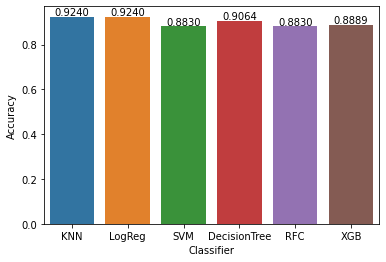

In [49]:
axis = sns.barplot(x='Algorithm Name',y='Score',data = scores)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    

In [50]:
scores # Baseline model Cross-validation

,Algorithm Name,Score
0,KNN,0.923977
1,LogReg,0.923977
2,SVM,0.883041
3,DecisionTree,0.906433
4,RFC,0.883041
5,XGB,0.888889


#4.2 Second Model HyperParameters Tuning:

##*1. Decision Tree Algorithm*

---



In [51]:
dt = mymodel(DecisionTreeClassifier()) # Current Accuracy

Training Accuracy : 1.0
Testing Accuracy : 0.9298245614035088


              precision    recall  f1-score   support

           0       0.93      0.96      0.94       107
           1       0.93      0.88      0.90        64

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



In [52]:
parameters = {
    "criterion":["gini", "entropy"],
    "max_depth": list(range(1,50, 5)),
    "min_samples_leaf": list(range(1, 50, 5))
}

In [53]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), parameters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46],
                         'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41,
                                              46]},
             verbose=2)

In [54]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1}

In [55]:
grid.best_score_

0.9622784810126582

In [56]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [60]:
dt2 = mymodel(grid.best_estimator_) # Post- HyperParameter Tuning For Decision Tree

Training Accuracy : 0.9974874371859297
Testing Accuracy : 0.9064327485380117


              precision    recall  f1-score   support

           0       0.90      0.96      0.93       107
           1       0.93      0.81      0.87        64

    accuracy                           0.91       171
   macro avg       0.91      0.89      0.90       171
weighted avg       0.91      0.91      0.90       171



##*2. SVM Tree Algorithm*

---



In [61]:
#Parameters

parameters ={'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1.1, 1.2],
                 'kernel': ['rbf']}


In [62]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), parameters, verbose=3)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1.1, 1.2],
                         'kernel': ['rbf']},
             verbose=3)

In [63]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [64]:
grid.best_score_

0.9472468354430379

In [65]:
grid.best_estimator_

SVC(C=100, gamma=0.0001)

In [66]:
svm = mymodel(grid.best_estimator_)

Training Accuracy : 0.9949748743718593
Testing Accuracy : 0.9298245614035088


              precision    recall  f1-score   support

           0       0.91      0.98      0.95       107
           1       0.96      0.84      0.90        64

    accuracy                           0.93       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171



##*3. Logistic Regression Algorithm*

---



In [67]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [68]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LogisticRegression(), parameters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, sol

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=2)

In [69]:
grid.best_params_

{'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [70]:
grid.best_score_

0.977373417721519

In [71]:
grid.best_estimator_

LogisticRegression(C=100.0, penalty='l1', solver='liblinear')

In [72]:
logreg = mymodel(grid.best_estimator_)

Training Accuracy : 0.9974874371859297
Testing Accuracy : 0.9649122807017544


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       107
           1       0.97      0.94      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



##*4. KNN Algorithm*

---



In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline(
    [
        ("sc", StandardScaler()),
        ("knn", KNeighborsClassifier())
    ]
)

from sklearn.model_selection import GridSearchCV
parameters = [{"knn__n_neighbors": [3, 5, 7, 9],
              "knn__weights": ["uniform", "distance"],
              "knn__leaf_size": [15, 20]}]

grid = GridSearchCV(pipe, parameters, cv=5, scoring="accuracy")
grid.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__leaf_size': [15, 20],
                          'knn__n_neighbors': [3, 5, 7, 9],
                          'knn__weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [74]:
grid.best_params_

{'knn__leaf_size': 15, 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}

In [75]:
grid.best_score_

0.969873417721519

In [76]:
grid.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsClassifier(leaf_size=15, n_neighbors=3))])

In [77]:
knn2 = mymodel(grid.best_estimator_)

Training Accuracy : 0.9874371859296482
Testing Accuracy : 0.9590643274853801


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



##*5. XGBClassifier Algorithm*

---



In [78]:
#parameters 

{'max_depth': [5,6,7,8],
'gamma': [0.01,0.001,0.001],
'min_child_weight':[1,5,10],
'learning_rate': [0.05,0.1, 0.2, 0.3],
'n_estimators':[5,10,20,100]}



{'max_depth': [5, 6, 7, 8],
 'gamma': [0.01, 0.001, 0.001],
 'min_child_weight': [1, 5, 10],
 'learning_rate': [0.05, 0.1, 0.2, 0.3],
 'n_estimators': [5, 10, 20, 100]}

In [79]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(XGBClassifier(), parameters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END knn__leaf_size=15, knn__n_neighbors=3, knn__weights=uniform; total time=   0.1s
[CV] END knn__leaf_size=15, knn__n_neighbors=3, knn__weights=uniform; total time=   0.1s
[CV] END knn__leaf_size=15, knn__n_neighbors=3, knn__weights=uniform; total time=   0.1s
[CV] END knn__leaf_size=15, knn__n_neighbors=3, knn__weights=uniform; total time=   0.1s
[CV] END knn__leaf_size=15, knn__n_neighbors=3, knn__weights=uniform; total time=   0.1s
[CV] END knn__leaf_size=15, knn__n_neighbors=3, knn__weights=distance; total time=   0.1s
[CV] END knn__leaf_size=15, knn__n_neighbors=3, knn__weights=distance; total time=   0.1s
[CV] END knn__leaf_size=15, knn__n_neighbors=3, knn__weights=distance; total time=   0.1s
[CV] END knn__leaf_size=15, knn__n_neighbors=3, knn__weights=distance; total time=   0.1s
[CV] END knn__leaf_size=15, knn__n_neighbors=3, knn__weights=distance; total time=   0.1s
[CV] END knn__leaf_size=15, knn__n_neighbors

GridSearchCV(estimator=XGBClassifier(),
             param_grid=[{'knn__leaf_size': [15, 20],
                          'knn__n_neighbors': [3, 5, 7, 9],
                          'knn__weights': ['uniform', 'distance']}],
             verbose=2)

In [80]:
grid.best_params_

{'knn__leaf_size': 15, 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}

In [81]:
grid.best_score_

0.9698417721518986

In [82]:
grid.best_estimator_

XGBClassifier(knn__leaf_size=15, knn__n_neighbors=3, knn__weights='uniform')

In [83]:
xgb = mymodel(grid.best_estimator_)

Training Accuracy : 1.0
Testing Accuracy : 0.9415204678362573


              precision    recall  f1-score   support

           0       0.92      0.99      0.95       107
           1       0.98      0.86      0.92        64

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



##*6. Random Foreset Algorithm*

---



In [84]:
#Parameters

parameters = {
    'max_depth': [3, 5, 6, 7, 8],
    'max_features':[2,4,6,7,8,9],
    'n_estimators':[50,100],
    'min_samples_split': [3, 5, 6, 7]
}


In [85]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(RandomForestClassifier(), parameters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END max_depth=3, max_features=2, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=2, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=2, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=2, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=2, min_samples_split=3, n_estimators=100; 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 6, 7, 8],
                         'max_features': [2, 4, 6, 7, 8, 9],
                         'min_samples_split': [3, 5, 6, 7],
                         'n_estimators': [50, 100]},
             verbose=2)

In [86]:
grid.best_params_

{'max_depth': 7, 'max_features': 8, 'min_samples_split': 6, 'n_estimators': 50}

In [87]:
grid.best_score_

0.9723734177215189

In [88]:
grid.best_estimator_

RandomForestClassifier(max_depth=7, max_features=8, min_samples_split=6,
                       n_estimators=50)

In [89]:
rfc = mymodel(grid.best_estimator_)

Training Accuracy : 0.9974874371859297
Testing Accuracy : 0.9415204678362573


              precision    recall  f1-score   support

           0       0.93      0.98      0.95       107
           1       0.97      0.88      0.92        64

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [90]:
knn_accuracy = cross_val_score(knn2,xtest,ytest,cv=3,scoring='accuracy')
logreg_accuracy = cross_val_score(logreg,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
svm_accuracy = cross_val_score(svm,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
dt_accuracy = cross_val_score(dt,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
rfc_accuracy = cross_val_score(rfc,xtest,ytest,cv=3,scoring='accuracy')
xgb_accuracy = cross_val_score(xgb,xtest,ytest,cv=3,scoring='accuracy')


In [91]:
names = ['KNN','LogReg','SVM','DecisionTree','RFC','XGB']
score =[knn_accuracy.mean(),logreg_accuracy.mean(),svm_accuracy.mean(),dt_accuracy.mean(),rfc_accuracy.mean(),xgb_accuracy.mean()]

In [92]:
scores_2nd = pd.DataFrame({'Algorithm Name':names,'Score':score})

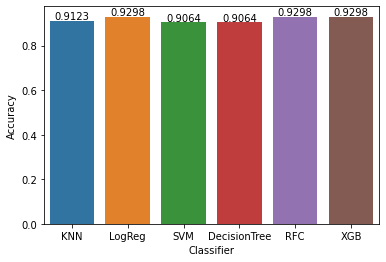

In [93]:
axis = sns.barplot(x='Algorithm Name',y='Score',data = scores_2nd)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 

In [94]:
scores_2nd # Cross-validation post HyperParameter Tuning 

,Algorithm Name,Score
0,KNN,0.912281
1,LogReg,0.929825
2,SVM,0.906433
3,DecisionTree,0.906433
4,RFC,0.929825
5,XGB,0.929825


In [95]:
scores # Cross-validation for the Base model

,Algorithm Name,Score
0,KNN,0.923977
1,LogReg,0.923977
2,SVM,0.883041
3,DecisionTree,0.906433
4,RFC,0.883041
5,XGB,0.888889


In [96]:
scores_2nd['Score'].max() 

0.9298245614035089

In [97]:
scores['Score'].max() 

0.9239766081871345

In [98]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
ypred = rfc.predict(xtest)

In [99]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
ac = accuracy_score(ytest, ypred)
ra = roc_auc_score(ytest, ypred)
cm = confusion_matrix(ytest, ypred)
cr = classification_report(ytest, ypred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n\n{cr}")

Accuracy : 0.9415204678362573
ROC : 0.9281542056074766
[[105   2]
 [  8  56]]

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       107
           1       0.97      0.88      0.92        64

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [100]:
train = rfc.score(xtrain, ytrain)
test = rfc.score(xtest, ytest)
    
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       107
           1       0.97      0.88      0.92        64

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [101]:
print(f"Actual Values     : {ytest[:25].values}")
print(f"Predicted Values  : {ypred[:25]}")

Actual Values     : [0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0]
Predicted Values  : [0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0]


In [102]:
print(f"Actual Values     : {ytest[25:51].values}")
print(f"Predicted Values  : {ypred[25:51]}")

Actual Values     : [0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1]
Predicted Values  : [0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0]


In [103]:
rfc.predict_proba(xtest)

array([[1.  , 0.  ],
       [0.07, 0.93],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.08, 0.92],
       [1.  , 0.  ],
       [0.9 , 0.1 ],
       [0.99, 0.01],
       [0.93, 0.07],
       [0.95, 0.05],
       [0.49, 0.51],
       [0.94, 0.06],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.95, 0.05],
       [0.66, 0.34],
       [0.87, 0.13],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.88, 0.12],
       [0.82, 0.18],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.94, 0.06],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.3 , 0.7 ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.03, 0.97],
       [0.97, 0.03],
       [0.15,

In [104]:
ypredprob = rfc.predict_proba(xtest)[:, 1]

In [105]:
ypredprob #probability of a patient for being churn i.e for class 1

array([0.  , 0.93, 1.  , 0.  , 0.02, 0.  , 0.92, 0.  , 0.1 , 0.01, 0.07,
       0.05, 0.51, 0.06, 0.  , 1.  , 0.05, 0.34, 0.13, 0.  , 1.  , 0.12,
       0.18, 0.99, 0.  , 0.01, 0.01, 1.  , 0.06, 1.  , 0.  , 0.01, 0.  ,
       0.7 , 0.  , 0.  , 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ,
       1.  , 0.97, 0.03, 0.85, 0.07, 0.99, 0.03, 0.95, 0.  , 0.  , 0.99,
       1.  , 1.  , 0.01, 1.  , 0.86, 0.65, 0.  , 0.01, 1.  , 0.  , 0.  ,
       0.02, 0.94, 0.  , 1.  , 1.  , 0.06, 0.  , 1.  , 0.82, 1.  , 0.01,
       0.9 , 0.18, 0.  , 0.99, 0.  , 0.  , 0.01, 0.  , 1.  , 0.13, 0.  ,
       0.84, 0.  , 1.  , 0.78, 0.13, 0.99, 0.  , 1.  , 0.87, 0.84, 0.85,
       0.15, 0.01, 0.11, 0.  , 0.87, 0.05, 0.01, 0.37, 0.  , 1.  , 0.35,
       1.  , 0.41, 0.02, 0.  , 0.  , 0.  , 0.01, 0.  , 0.19, 1.  , 0.65,
       1.  , 0.92, 0.02, 0.02, 0.78, 0.73, 0.82, 1.  , 0.  , 0.09, 0.  ,
       0.04, 0.  , 0.  , 0.  , 0.19, 0.  , 0.27, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.05, 1.  , 0.98, 0.12, 0.  , 0.

In [106]:
from sklearn.preprocessing import binarize

In [107]:
ypred = binarize([ypredprob], threshold=0.3)[0]

In [108]:
print(f"Actual Values     : {ytest[:25].values}")
print(f"Predicted Values  : {ypred[:25].astype(int)}")

Actual Values     : [0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0]
Predicted Values  : [0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0]


In [109]:
ac = accuracy_score(ytest, ypred)
ra = roc_auc_score(ytest, ypred)
cm = confusion_matrix(ytest, ypred)
cr = classification_report(ytest, ypred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n\n{cr}")

Accuracy : 0.9532163742690059
ROC : 0.946918808411215
[[104   3]
 [  5  59]]

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.95      0.92      0.94        64

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [110]:
train = rfc.score(xtrain, ytrain)
test = rfc.score(xtest, ytest)

print(f"Training Accuracy - : {train}\nTesting Accuracy -: {test}")

Training Accuracy - : 1.0
Testing Accuracy -: 0.9415204678362573


In [111]:
from sklearn.metrics import roc_curve

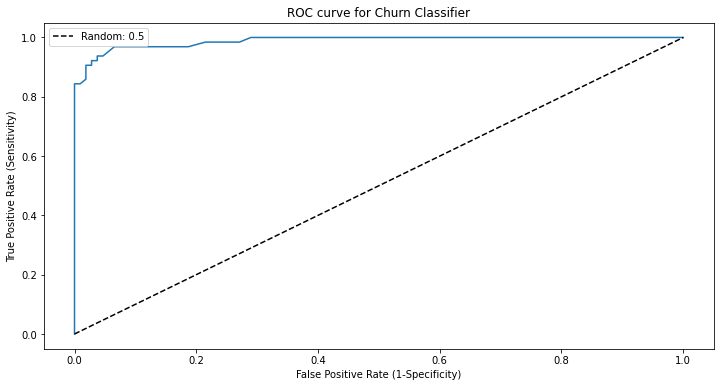

In [112]:
plt.figure(figsize = (12,6), linewidth= 1)

fpr, tpr, thres = roc_curve(ytest, ypredprob)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')

plt.title("ROC curve for Churn Classifier")
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend(loc='best')

#plt.grid()
plt.show()           

# **5.Conlusion**

>The number of customers purchased through social networking advertisements is far less than the total number of customers who viewed the advertisement.

>37.74% of female customers have purchased a product through social networking advertisement whereas only 

>33.67% of male customers purchased through social networking advertisements.
For KNN, K =5 to K =18 has the least error rate and K= 35 has the maximum error rate.

>The best Parameter for SVM is Kernel RBF with gamma =1 and C =1.
KNN with least error rate and SVM with the best optimization parameter have the overall:

>Accuracy 93%

>Precision, Recall, and F1-score for predicting the not purchased category is above 94%
>Precision, Recall, and F1-score for predicting purchased category is close to 90%.